In [1]:
import numpy as np
import json

In [2]:
train_data = json.load(open("train.json"))
test_data = json.load(open("test.json"))

In [3]:
title_len = []
abstract_len = []
len(train_data) #25793
for i in range(len(train_data)):
    title_len.append(len(train_data[i]["title"]))
    abstract_len.append(len(train_data[i]["abstract"]))
max_title = max(title_len)
max_abstract = max(abstract_len)

(array([2.0000e+02, 4.1900e+03, 1.0595e+04, 6.3340e+03, 3.2750e+03,
        8.1100e+02, 1.8300e+02, 8.6000e+01, 3.8000e+01, 1.5000e+01,
        1.3000e+01, 9.0000e+00, 1.1000e+01, 1.8000e+01, 5.0000e+00,
        3.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  0.        ,   6.68421053,  13.36842105,  20.05263158,
         26.73684211,  33.42105263,  40.10526316,  46.78947368,
         53.47368421,  60.15789474,  66.84210526,  73.52631579,
         80.21052632,  86.89473684,  93.57894737, 100.26315789,
        106.94736842, 113.63157895, 120.31578947, 127.        ]),
 <BarContainer object of 19 artists>)

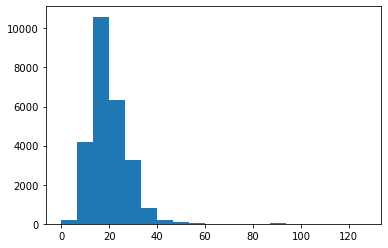

In [4]:
import matplotlib.pyplot as plt
plt.hist(title_len,np.linspace(0,max_title,20))

(array([1.2790e+04, 1.2081e+04, 5.3500e+02, 1.8400e+02, 9.1000e+01,
        6.5000e+01, 1.9000e+01, 6.0000e+00, 8.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.        ,  147.57894737,  295.15789474,  442.73684211,
         590.31578947,  737.89473684,  885.47368421, 1033.05263158,
        1180.63157895, 1328.21052632, 1475.78947368, 1623.36842105,
        1770.94736842, 1918.52631579, 2066.10526316, 2213.68421053,
        2361.26315789, 2508.84210526, 2656.42105263, 2804.        ]),
 <BarContainer object of 19 artists>)

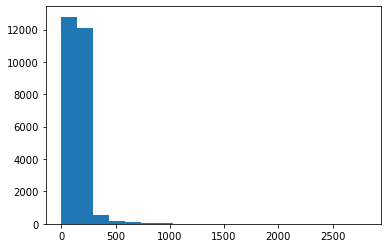

In [5]:
plt.hist(abstract_len,np.linspace(0,max_abstract,20))

In [6]:
# filter the author
for item in train_data:
    prolific_authors = []
    coauthors = []
    for i in range(len(item["authors"])):
        if item["authors"][i]<100:
            prolific_authors.append(item["authors"][i])
            coauthors = coauthors
        else:
            prolific_authors = prolific_authors
            coauthors.append(item["authors"][i])
            
        item["prolific_authors"] = prolific_authors
        item["coauthors"] = coauthors

# One-hot encoding

In [7]:
def one_hot_feature(each_item):
    # year
    year_vec = np.zeros(20)
    year = each_item['year']
    year_vec[year] = 1
    
    # venue
    venue_vec = np.zeros(466) # max_n_venue+1 for if there is no specified venue
    venue = each_item['venue']
    if venue == '':
        venue_vec[-1] = 1
    else:
        venue_vec[venue] = 1
    
    # title
    title_vec = np.zeros(4999)
    title = each_item['title']
    for word in title:
        title_vec[word-1] = 1

    # abstract
    abstract_vec = np.zeros(4999)
    abstract = each_item['abstract']
    for word in abstract:
        abstract_vec[word-1] = 1
        
    # coauthor
    coauthor_vec = np.zeros(21246)
    coauthor = each_item["coauthors"]
    coauthor_vec[coauthor] = 1

    return np.concatenate([year_vec,venue_vec, title_vec, abstract_vec, coauthor_vec])

In [8]:
# for y-label
def one_hot_label(each_item):
    prolific_author_vec = np.zeros(100) # ID with 1-99, extra for NONE
    prolific_author = each_item['prolific_authors']
    if prolific_author == '':
        prolific_author_vec[-1] = 1
    else:
        prolific_author_vec[prolific_author] = 1
    return prolific_author_vec